# Install & Load Package

In [1]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

In [2]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

# Load Dataset

In [3]:
# load customer churn dataset
churn_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

In [4]:
# check the first 5 data frim churn_data
churn_data.head()

user_id     attrition_flag  customer_age gender  dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  education_level marital_status income_category card_category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

# Data Inspection

In [5]:
# check churn_data data structure and its types
churn_data.dtypes

user_id                       int64
attrition_flag               object
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
dtype: object

In [6]:
# check data dimension
churn_data.shape

(10127, 21)

In [7]:
# check null values inside dataset
churn_data.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [8]:
# removes row with na values
churn_data = churn_data.dropna()

In [9]:
# check dimension and null values inside dataset
print("Dimension of data: {}".format(churn_data.shape))
print("Number of null values:")
churn_data.isna().sum()

Dimension of data: (10127, 21)
Number of null values:


user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [10]:
# drop custid column
churn_data = churn_data.drop(['user_id'], axis = 1)

# Simple EDA

<Axes: xlabel='attrition_flag'>

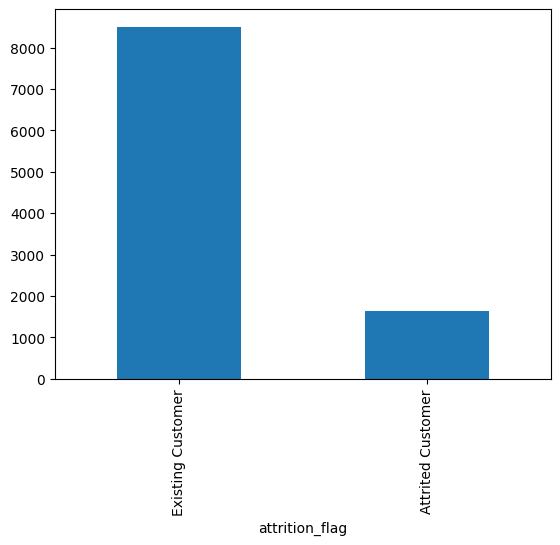

In [11]:
# check target class distribution
churn_data['attrition_flag'].value_counts().plot(kind = 'bar')

In [12]:
# check churn_data structure
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

In [13]:
# Binning customer_age
age_bins = [0, 25, 35, 45, 55, 100]  # batas usia
age_labels = ['<25', '25-34', '35-44', '45-54', '55+']  # label kategori
churn_data['age_group'] = pd.cut(churn_data['customer_age'], bins=age_bins, labels=age_labels)

In [14]:
# Pastikan batas tertinggi sudah diatur lebih besar secara manual daripada nilai maksimum di months_on_book
tenure_bins = [0, 12, 24, 36, 48, 60, 999]  # Gunakan 999 sebagai batas tertinggi
tenure_labels = ['<12', '12-24', '25-36', '37-48', '49-60', '60+']

# Melakukan binning
churn_data['tenure_group'] = pd.cut(churn_data['months_on_book'], bins=tenure_bins, labels=tenure_labels)


In [15]:
# check data
churn_data.head()

attrition_flag  customer_age gender  dependent_count education_level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  marital_status income_category card_category  months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   total_relationship_count  ...  credit_limit  total_revolving_bal  \
0                         5  ...       12691.0                  777   
1                         6  ...        8256.0                  864   
2                         4  ...        3418.0                    0   
3                         3  ...        3313.0                 2517   
4                         5  ...        4716.0                    0   

   avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
0          11914.0                 1.335             1144              42   
1           7392.0                 1.541             1291              33   
2           3418.0                 2.594             1887              20   
3            796.0                 1.405             1171              20   
4           4716.0                 2.175              816              28   

   total_ct_chng_q4_q1  avg_utilization_ratio  age_group  tenure_group  
0                1.625                  0.061      35-44         37-48  
1                3.714                  0.105      45-54         37-48  
2                2.333                  0.000      45-54         25-36  
3                2.333                  0.760      35-44         25-36  
4                2.500                  0.000      35-44         12-24  

[5 rows x 22 columns]

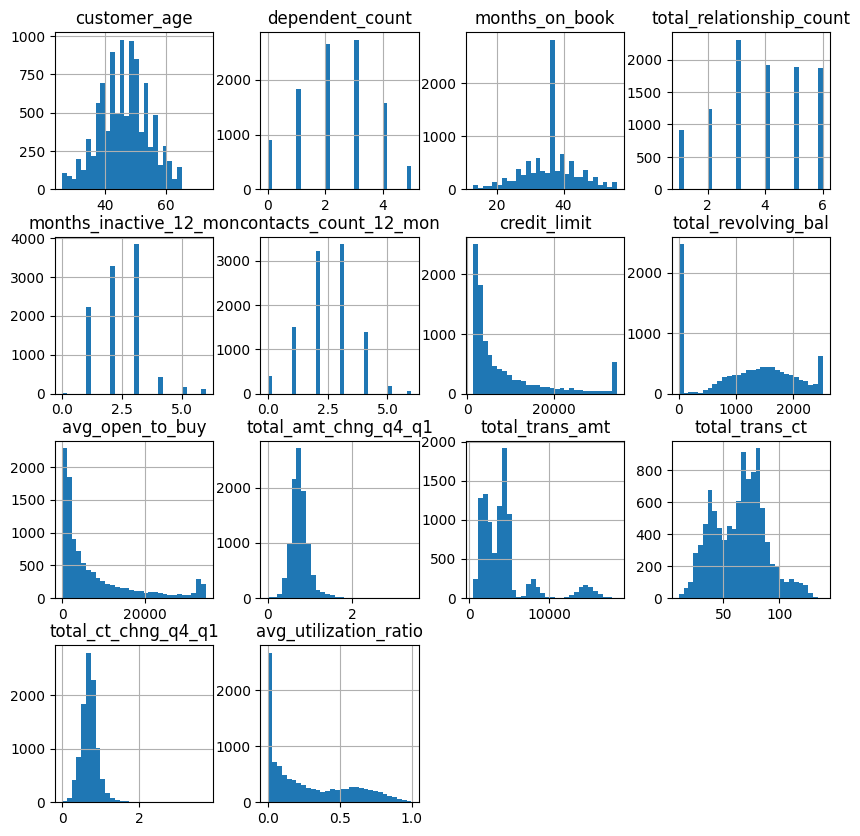

In [16]:
# check numerical data distribution
churn_data.hist(bins=30, figsize = (10, 10));

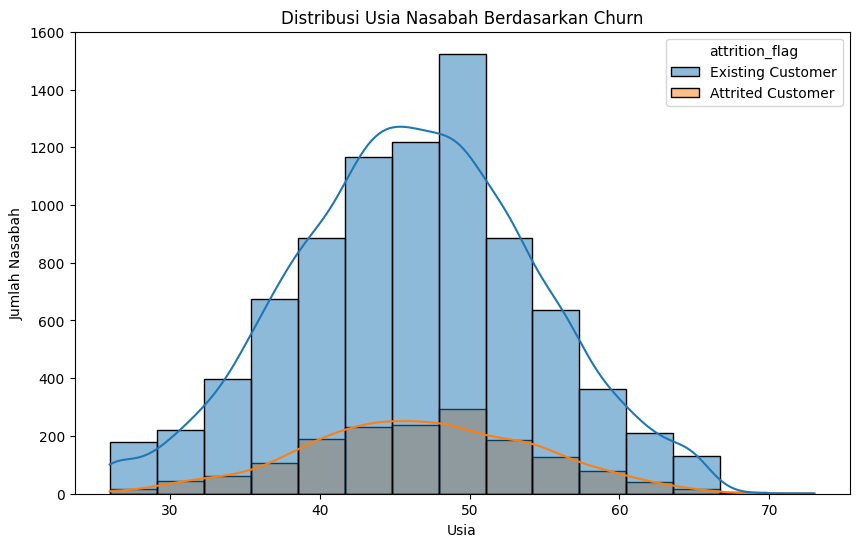

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_data, x='customer_age', hue='attrition_flag', kde=True, bins=15)
plt.title('Distribusi Usia Nasabah Berdasarkan Churn')
plt.xlabel('Usia')
plt.ylabel('Jumlah Nasabah')
plt.show()

Hubungan Usia dengan Churn:

* Nasabah yang churn (berwarna oranye) tampak relatif lebih sedikit dibandingkan nasabah yang bertahan (berwarna biru) di setiap kelompok usia.
* Meski churn terjadi di hampir setiap rentang usia, ada indikasi bahwa churn lebih cenderung terjadi di usia 40-50 tahun.
* Tingkat churn terlihat lebih tinggi pada kelompok usia 40-50 tahun dibandingkan kelompok usia lainnya. Kelompok ini memiliki jumlah nasabah yang churn lebih signifikan, meskipun secara total jumlah nasabah pada usia ini juga lebih tinggi.
* Di kelompok usia yang lebih tua (sekitar 60 tahun ke atas), jumlah nasabah yang churn tampak lebih kecil, tetapi ini juga dapat disebabkan oleh lebih sedikitnya jumlah nasabah pada kelompok usia ini.

In [18]:
churn_data['attrition_flag'] = churn_data['attrition_flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})

<ipython-input-18-39ab376637e4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_data['attrition_flag'] = churn_data['attrition_flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})


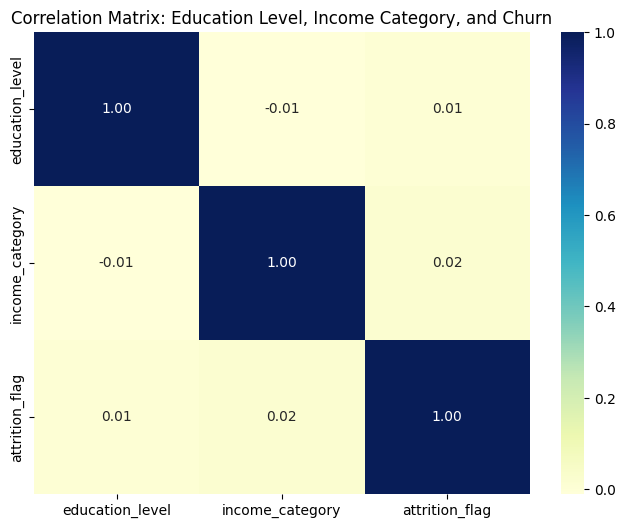

In [19]:
churn_data['education_level'] = churn_data['education_level'].astype('category').cat.codes
churn_data['income_category'] = churn_data['income_category'].astype('category').cat.codes

# Step 2: Hitung korelasi
correlation_matrix = churn_data[['education_level', 'income_category', 'attrition_flag']].corr()

# Step 3: Plot korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix: Education Level, Income Category, and Churn")
plt.show()

* Korelasi antara Tingkat Pendidikan (education_level) dan Kategori Pendapatan (income_category):
Nilai korelasi antara education_level dan income_category adalah -0.01, yang menunjukkan korelasi yang sangat lemah dan hampir tidak ada hubungan antara tingkat pendidikan dan kategori pendapatan. Ini berarti perubahan dalam tingkat pendidikan tidak terlalu berhubungan dengan kategori pendapatan.

* Korelasi antara Tingkat Pendidikan (education_level) dan Churn (attrition_flag):
Nilai korelasi antara education_level dan attrition_flag adalah 0.01, yang menunjukkan hubungan yang sangat lemah dan hampir tidak ada korelasi antara tingkat pendidikan dan kemungkinan churn. Artinya, tingkat pendidikan tidak memiliki pengaruh signifikan terhadap churn.

* Korelasi antara Kategori Pendapatan (income_category) dan Churn (attrition_flag):
Nilai korelasi antara income_category dan attrition_flag adalah 0.02, juga menunjukkan korelasi yang sangat lemah. Hal ini menunjukkan bahwa kategori pendapatan tidak memiliki pengaruh yang signifikan terhadap churn.

attrition_flag     0    1
gender                   
F               4428  930
M               4072  697


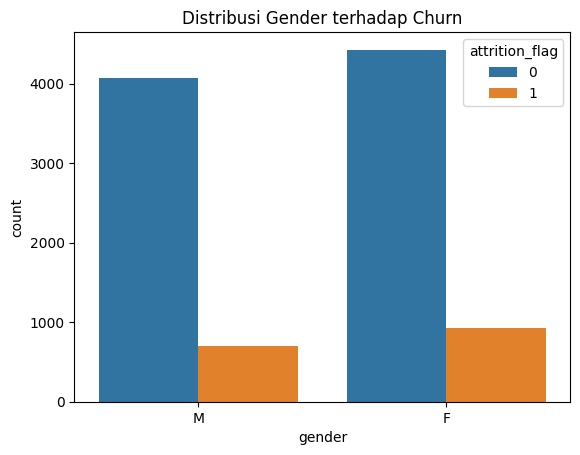

In [20]:
# Crosstab antara gender dan churn
gender_churn = pd.crosstab(churn_data['gender'], churn_data['attrition_flag'])
print(gender_churn)

# Visualisasi
sns.countplot(data=churn_data, x='gender', hue='attrition_flag')
plt.title('Distribusi Gender terhadap Churn')
plt.show()

Interpretasi:

* Secara total, jumlah nasabah wanita yang churn (930) lebih tinggi dibandingkan pria (697), meskipun jumlah total nasabah wanita juga lebih tinggi.

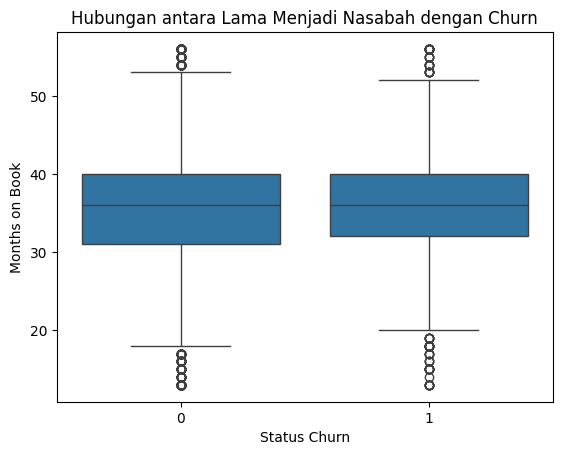

In [21]:
sns.boxplot(data=churn_data, x='attrition_flag', y='months_on_book')
plt.title('Hubungan antara Lama Menjadi Nasabah dengan Churn')
plt.xlabel('Status Churn')
plt.ylabel('Months on Book')
plt.show()

* Kedua kelompok (nasabah yang churn dan tidak churn) memiliki distribusi lama menjadi nasabah yang mirip, dengan nilai median yang hampir sama.
* Rentang interkuartil (IQR), yang menunjukkan 50% data di tengah, serupa untuk kedua kelompok. Ini menunjukkan bahwa tidak ada perbedaan signifikan dalam rata-rata lama waktu antara nasabah yang churn dan yang tidak churn.
* Terdapat outlier di kedua kelompok, dengan beberapa nasabah yang memiliki durasi sangat pendek atau sangat panjang sebagai nasabah.

**Kesimpulan** : Tidak terlihat adanya korelasi kuat antara lamanya nasabah menjadi pelanggan bank dan status churn. Mungkin ada faktor lain yang lebih berpengaruh dalam memprediksi churn pada dataset ini.

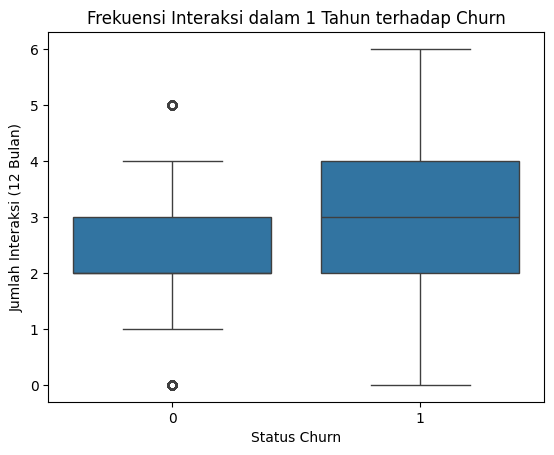

In [22]:
sns.boxplot(data=churn_data, x='attrition_flag', y='contacts_count_12_mon')
plt.title('Frekuensi Interaksi dalam 1 Tahun terhadap Churn')
plt.xlabel('Status Churn')
plt.ylabel('Jumlah Interaksi (12 Bulan)')
plt.show()

* Median Interaksi: Pelanggan yang churn (status 1) memiliki median frekuensi interaksi yang lebih tinggi dibandingkan dengan yang tidak churn (status 0). Ini menunjukkan bahwa rata-rata, pelanggan yang sering berinteraksi cenderung lebih mungkin untuk churn.

* Rentang Interaksi: Rentang interaksi untuk pelanggan yang churn juga lebih lebar dibandingkan dengan yang tidak churn, menunjukkan variasi yang lebih besar dalam frekuensi interaksi.
* Secara keseluruhan, frekuensi interaksi tampaknya berkorelasi positif dengan kemungkinan churn. Semakin sering pelanggan berinteraksi dengan bank dalam satu tahun terakhir, tampaknya semakin besar kemungkinan mereka untuk churn.

# Feature Engineering

In [23]:
# Encoding variabel kategorikal
churn_data = pd.get_dummies(churn_data, columns=['education_level', 'marital_status', 'income_category', 'card_category', 'gender'], drop_first=True)

In [24]:
# Feature Interactions
churn_data['relationship_month_product'] = churn_data['total_relationship_count'] * churn_data['months_on_book']
churn_data['trans_amt_utilization_ratio'] = churn_data['total_trans_amt'] * churn_data['avg_utilization_ratio']

In [25]:
#Aggregate Ratios and Differences
churn_data['credit_usage_ratio'] = churn_data['total_revolving_bal'] / churn_data['credit_limit']
churn_data['avg_spend_per_transaction'] = churn_data['total_trans_amt'] / churn_data['total_trans_ct']

In [26]:
# Trend-based Features
churn_data['activity_increase'] = np.where(churn_data['total_amt_chng_q4_q1'] > 1, 1, 0)  # Binary feature: 1 if transactions increased, else 0
churn_data['transaction_count_increase'] = np.where(churn_data['total_ct_chng_q4_q1'] > 1, 1, 0)  # Binary feature for transaction count increase

In [27]:
# Normalisasi/Konversi ke Skala Logaritmik
churn_data['log_credit_limit'] = np.log1p(churn_data['credit_limit'])
churn_data['log_total_trans_amt'] = np.log1p(churn_data['total_trans_amt'])
churn_data['log_total_revolving_bal'] = np.log1p(churn_data['total_revolving_bal'])

In [28]:
# Days Since Last Activity
churn_data['days_since_last_activity'] = (12 - churn_data['months_inactive_12_mon']) * 30

In [29]:
# Engagement Score
churn_data['engagement_score'] = churn_data['contacts_count_12_mon'] + churn_data['total_trans_ct'] + churn_data['total_relationship_count']

In [30]:
# check the first 5 rows
churn_data.head()

attrition_flag  customer_age  dependent_count  months_on_book  \
0               0            45                3              39   
1               0            49                5              44   
2               0            51                3              36   
3               0            40                4              34   
4               0            40                3              21   

   total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  ...  \
0       12691.0                  777          11914.0  ...   
1        8256.0                  864           7392.0  ...   
2        3418.0                    0           3418.0  ...   
3        3313.0                 2517            796.0  ...   
4        4716.0                    0           4716.0  ...   

   trans_amt_utilization_ratio  credit_usage_ratio  avg_spend_per_transaction  \
0                       69.784            0.061224                  27.238095   
1                      135.555            0.104651                  39.121212   
2                        0.000            0.000000                  94.350000   
3                      889.960            0.759734                  58.550000   
4                        0.000            0.000000                  29.142857   

   activity_increase  transaction_count_increase log_credit_limit  \
0                  1                           1         9.448727   
1                  1                           1         9.018817   
2                  1                           1         8.137103   
3                  1                           1         8.105911   
4                  1                           1         8.458928   

  log_total_trans_amt  log_total_revolving_bal  days_since_last_activity  \
0            7.043160                 6.656727                       330   
1            7.163947                 6.762730                       330   
2            7.543273                 0.000000                       330   
3            7.066467                 7.831220                       240   
4            6.705639                 0.000000                       330   

   engagement_score  
0                50  
1                41  
2                24  
3                24  
4                33  

[5 rows x 46 columns]

In [31]:
# drop certain columns
churn_data = churn_data.drop(['customer_age', 'months_on_book', 'total_trans_amt', 'credit_limit', 'total_trans_ct', 'total_revolving_bal','total_amt_chng_q4_q1','total_ct_chng_q4_q1', 'months_inactive_12_mon','contacts_count_12_mon','total_relationship_count' ], axis = 1)

In [32]:
# check the first 5 rows
churn_data.head()

attrition_flag  dependent_count  avg_open_to_buy  avg_utilization_ratio  \
0               0                3          11914.0                  0.061   
1               0                5           7392.0                  0.105   
2               0                3           3418.0                  0.000   
3               0                4            796.0                  0.760   
4               0                3           4716.0                  0.000   

  age_group tenure_group  education_level_1  education_level_2  \
0     35-44        37-48              False              False   
1     45-54        37-48              False               True   
2     45-54        25-36              False               True   
3     35-44        25-36              False              False   
4     35-44        12-24              False              False   

   education_level_3  education_level_4  ...  trans_amt_utilization_ratio  \
0               True              False  ...                       69.784   
1              False              False  ...                      135.555   
2              False              False  ...                        0.000   
3               True              False  ...                      889.960   
4              False              False  ...                        0.000   

   credit_usage_ratio  avg_spend_per_transaction  activity_increase  \
0            0.061224                  27.238095                  1   
1            0.104651                  39.121212                  1   
2            0.000000                  94.350000                  1   
3            0.759734                  58.550000                  1   
4            0.000000                  29.142857                  1   

   transaction_count_increase  log_credit_limit  log_total_trans_amt  \
0                           1          9.448727             7.043160   
1                           1          9.018817             7.163947   
2                           1          8.137103             7.543273   
3                           1          8.105911             7.066467   
4                           1          8.458928             6.705639   

   log_total_revolving_bal  days_since_last_activity  engagement_score  
0                 6.656727                       330                50  
1                 6.762730                       330                41  
2                 0.000000                       330                24  
3                 7.831220                       240                24  
4                 0.000000                       330                33  

[5 rows x 35 columns]

In [33]:
# check the first 5 data after drop certain columns
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   attrition_flag               10127 non-null  int64   
 1   dependent_count              10127 non-null  int64   
 2   avg_open_to_buy              10127 non-null  float64 
 3   avg_utilization_ratio        10127 non-null  float64 
 4   age_group                    10127 non-null  category
 5   tenure_group                 10127 non-null  category
 6   education_level_1            10127 non-null  bool    
 7   education_level_2            10127 non-null  bool    
 8   education_level_3            10127 non-null  bool    
 9   education_level_4            10127 non-null  bool    
 10  education_level_5            10127 non-null  bool    
 11  education_level_6            10127 non-null  bool    
 12  marital_status_Married       10127 non-null  bool    
 13  m

In [34]:
# Mengonversi kolom kategori menjadi numerik (jika belum dilakukan encoding)
churn_data['age_group'] = churn_data['age_group'].cat.codes
churn_data['tenure_group'] = churn_data['tenure_group'].cat.codes

In [35]:
# check the first 5 data after drop certain columns
churn_data.head()

attrition_flag  dependent_count  avg_open_to_buy  avg_utilization_ratio  \
0               0                3          11914.0                  0.061   
1               0                5           7392.0                  0.105   
2               0                3           3418.0                  0.000   
3               0                4            796.0                  0.760   
4               0                3           4716.0                  0.000   

   age_group  tenure_group  education_level_1  education_level_2  \
0          2             3              False              False   
1          3             3              False               True   
2          3             2              False               True   
3          2             2              False              False   
4          2             1              False              False   

   education_level_3  education_level_4  ...  trans_amt_utilization_ratio  \
0               True              False  ...                       69.784   
1              False              False  ...                      135.555   
2              False              False  ...                        0.000   
3               True              False  ...                      889.960   
4              False              False  ...                        0.000   

   credit_usage_ratio  avg_spend_per_transaction  activity_increase  \
0            0.061224                  27.238095                  1   
1            0.104651                  39.121212                  1   
2            0.000000                  94.350000                  1   
3            0.759734                  58.550000                  1   
4            0.000000                  29.142857                  1   

   transaction_count_increase  log_credit_limit  log_total_trans_amt  \
0                           1          9.448727             7.043160   
1                           1          9.018817             7.163947   
2                           1          8.137103             7.543273   
3                           1          8.105911             7.066467   
4                           1          8.458928             6.705639   

   log_total_revolving_bal  days_since_last_activity  engagement_score  
0                 6.656727                       330                50  
1                 6.762730                       330                41  
2                 0.000000                       330                24  
3                 7.831220                       240                24  
4                 0.000000                       330                33  

[5 rows x 35 columns]

# Train-Test Split

In [36]:
# cretate predictor variables as X
X = churn_data.drop(['attrition_flag'], axis = 1)
# create target data as y
y = churn_data['attrition_flag']

In [37]:
# split data to train and test data
# where 30% of churn_data are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=1000
)

In [38]:
# check train data dimension
X_train.shape

(7088, 34)

In [39]:
# check test data dimension
X_test.shape

(3039, 34)

In [40]:
# check train target counts
y_train.value_counts()

attrition_flag
0    5949
1    1139
Name: count, dtype: int64

In [41]:
# check test target counts
y_test.value_counts()

attrition_flag
0    2551
1     488
Name: count, dtype: int64

# Exploratory Data Analysis

In [42]:
# create correlation matrix
X_train.corr().style.background_gradient(cmap='coolwarm')

In [43]:
# drop certain column on train data
column_to_drop = ['avg_utilization_ratio', 'log_total_trans_amt', 'log_credit_limit', 'trans_amt_utilization_ratio']
X_train = X_train.drop(column_to_drop, axis = 1)

# drop certain column in test data
X_test = X_test.drop(column_to_drop, axis = 1)

In [44]:
# pull numerical column
var_name = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [45]:
var_name

Index(['dependent_count', 'avg_open_to_buy', 'relationship_month_product',
       'credit_usage_ratio', 'avg_spend_per_transaction', 'activity_increase',
       'transaction_count_increase', 'log_total_revolving_bal',
       'days_since_last_activity', 'engagement_score'],
      dtype='object')

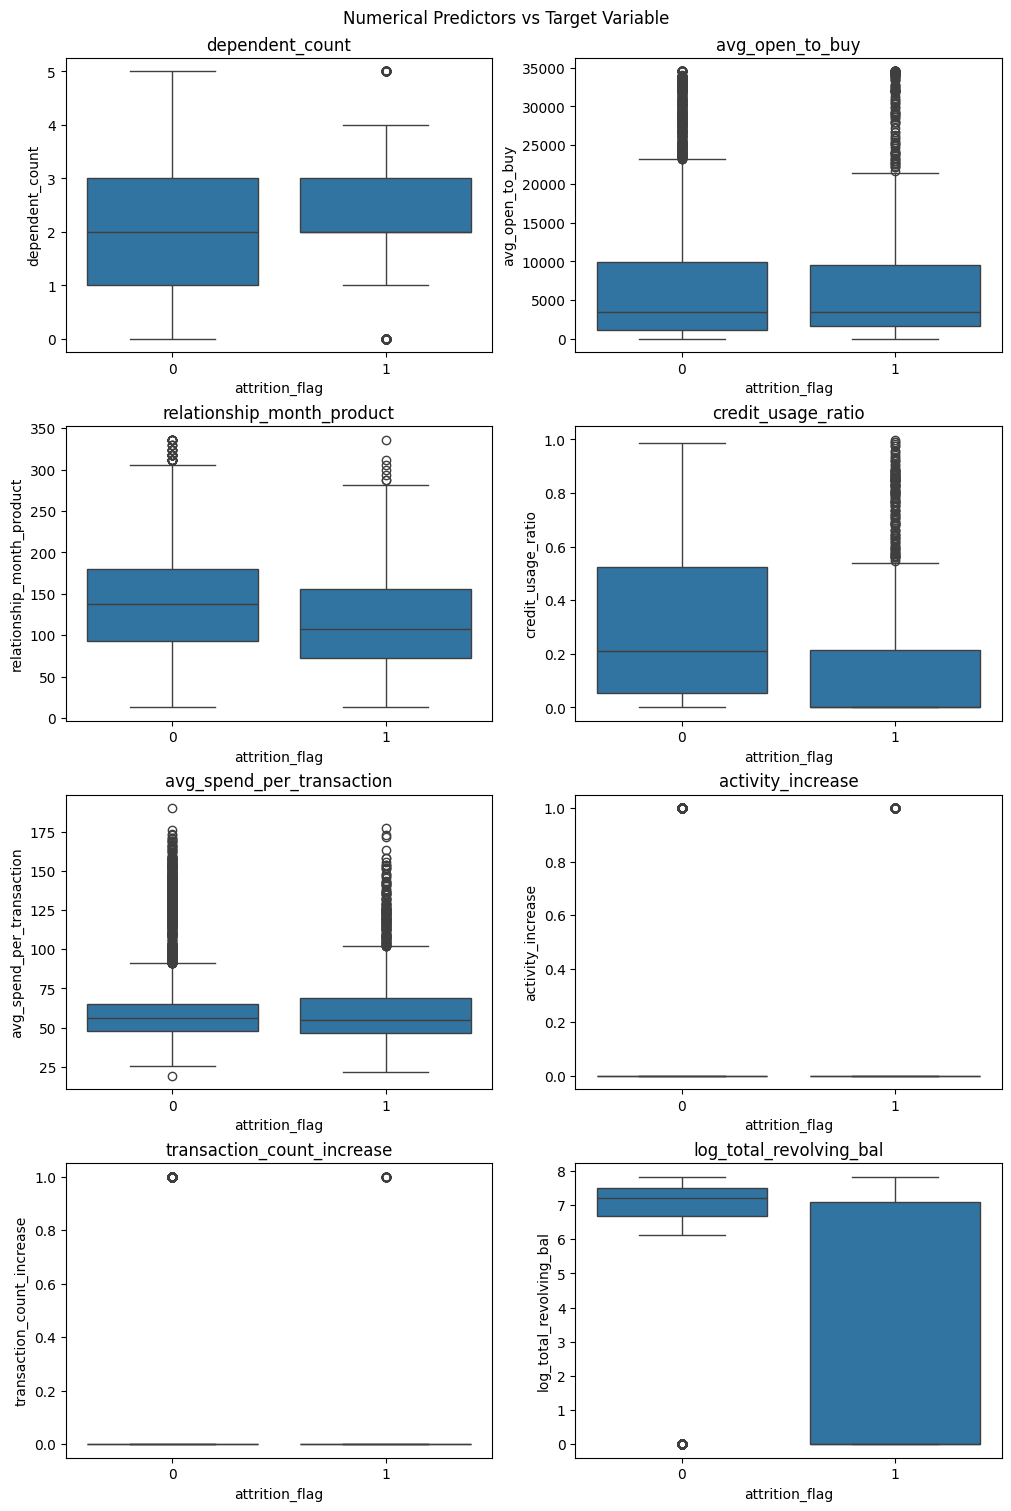

In [46]:
# # create subplot 4 x 2
fig, axes = plt.subplots(4,2, sharex=False, sharey = False, figsize=(10,15), constrained_layout = True)

fig.suptitle('Numerical Predictors vs Target Variable')

col_index = 0

for row in range(4):
  for col in range(2):
    sns.boxplot(ax = axes[row,col], x=y_train, y = X_train[var_name[col_index]])
    axes[row,col].set_title(var_name[col_index])
    # axes[row,col].xticks(color='w')
    col_index += 1

# Modeling

**Random Forest Model**
```python
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [47]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

**XGBoost Classifier**
```python
xgboost.XGBClassifier(*, objective='binary:logistic', use_label_encoder=True, **kwargs)
```
For further explanation, check: https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [48]:
# fit model no training data
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

In [49]:
xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

# Model Evaluation

In [50]:
# random forest prediction
rf_pred = random_forest_clf.predict(X_test)
rf_pred_proba = random_forest_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

**Classification Report**

In [51]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.940338    0.879679  0.932873     0.910008      0.930597
recall        0.982360    0.674180  0.932873     0.828270      0.932873
f1-score      0.960890    0.763341  0.932873     0.862115      0.929167
support    2551.000000  488.000000  0.932873  3039.000000   3039.000000

In [52]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.964037    0.871965  0.950313     0.918001      0.949252
recall        0.977264    0.809426  0.950313     0.893345      0.950313
f1-score      0.970605    0.839532  0.950313     0.905069      0.949558
support    2551.000000  488.000000  0.950313  3039.000000   3039.000000

**Confusion Matrix**

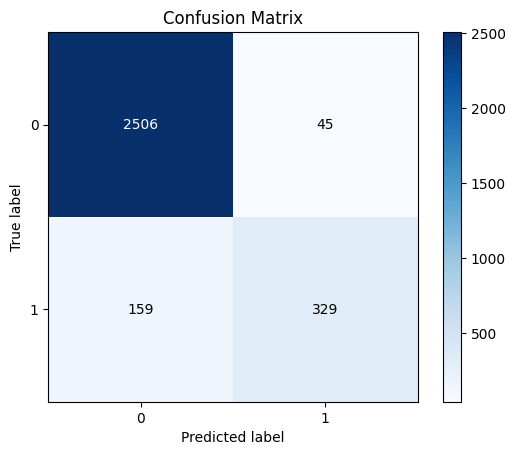

In [53]:
# random forest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

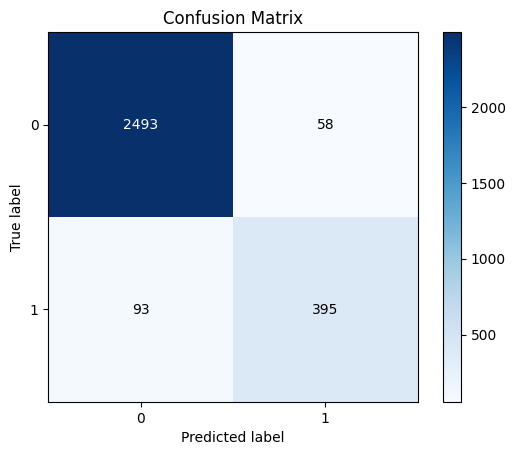

In [54]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

**ROC-AUC**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


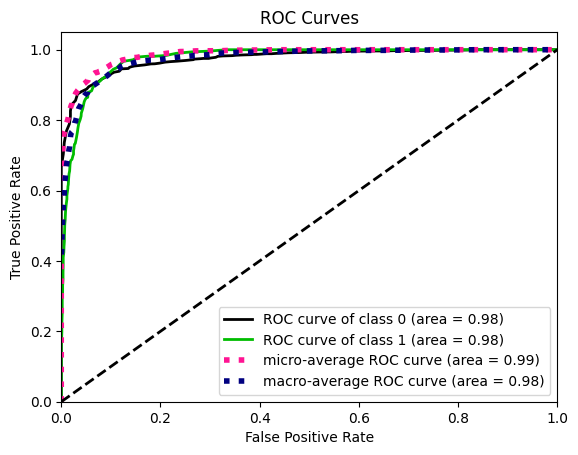

In [55]:
# random forest result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


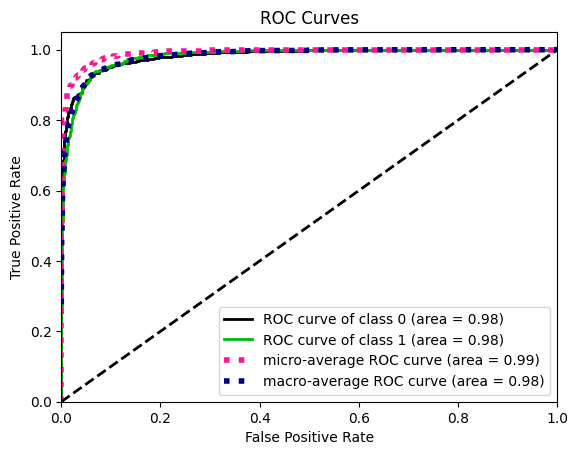

In [56]:
# xgboost result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

# Model Agnostic Methods

In [57]:
# Inititate Explainer for all models

## initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(random_forest_clf, X_train, y_train, label = "RF Interpretation")

## initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 7088 rows 30 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7088 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7eece94b68c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.16, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.38, mean = 0.000284, max = 0.45
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 7088 rows 30 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a nu

## Feature Importance

In [58]:
# visualizr permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

In [59]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()

## Partial Dependence Plot

In [60]:
# create partial dependence plot of Random Forest model
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.05 0.1  ... 4.9  4.95 5.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   7%|▋         | 2/30 [00:00<00:06,  4.04it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.   1.03 1.06 ... 3.94 3.97 4.  ]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  10%|█         | 3/30 [00:00<00:07,  3.75it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: Fu

In [61]:
# create partial dependence plot of XGBoost model
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.05 0.1  ... 4.9  4.95 5.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   7%|▋         | 2/30 [00:00<00:04,  5.96it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.   1.03 1.06 ... 3.94 3.97 4.  ]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  10%|█         | 3/30 [00:00<00:04,  5.64it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: Fu

## Shapley Value and Shapley Additive Explanations

### Dataset Level Explanation

**Random Forest Model**

In [62]:
# create sample used for developing shapley
data_for_shapley = X_train.sample(n = 1000, random_state = 1000)

In [63]:
# create SHAP Tree Explainer for random forest model with first 1000 rows of train data
rf_shap_values = shap.TreeExplainer(random_forest_clf).shap_values(data_for_shapley)

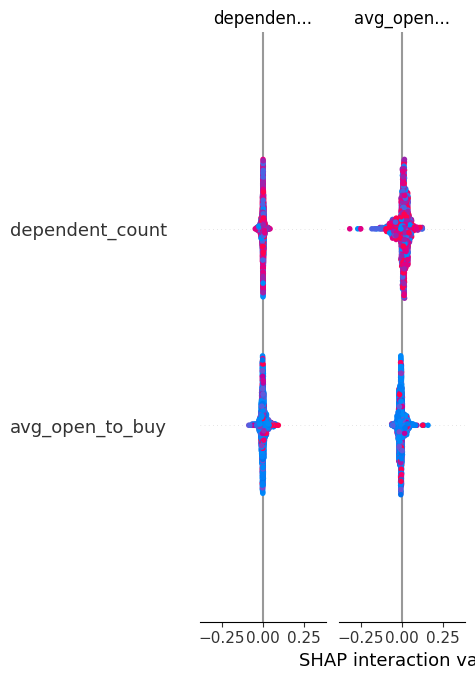

In [64]:
# create SHAP summary plot with next 1000 rows of train data
shap.summary_plot(rf_shap_values, X_train[1000:2000], plot_type='bar')

**XGBoost Model**

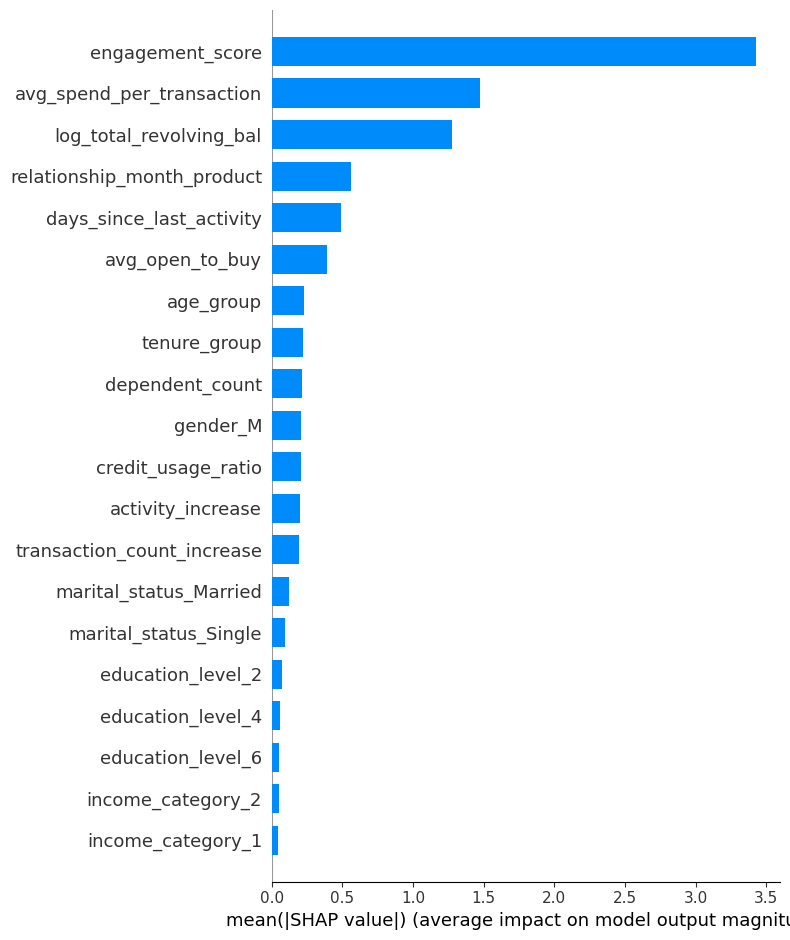

In [65]:
# create SHAP Tree Explainer for XGBoost model with| first 1000 rows of train data
xgb_shap_values = shap.TreeExplainer(xgb_clf).shap_values(X_train[:1000])

# create SHAP summary plot with next 1000 rows of train data
shap.summary_plot(xgb_shap_values, X_train[1000:2000], plot_type='bar')

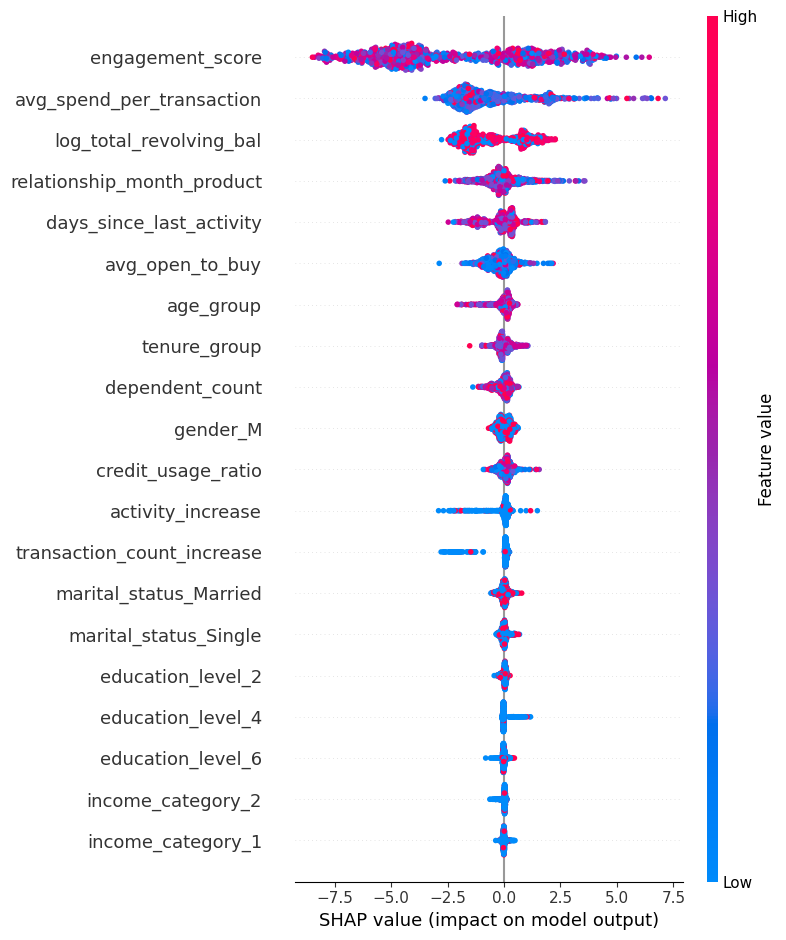

In [66]:
# create SHAP summary plot to visualize impact distribution of next 1000 rows of train data
shap.summary_plot(xgb_shap_values, X_train[1000:2000])

### Instance Level

In [67]:
# initiate javascript module
shap.initjs()

In [68]:
# check data for row 1
X_train.iloc[1,:]

dependent_count                       4
avg_open_to_buy                 33716.0
age_group                             3
tenure_group                          3
education_level_1                 False
education_level_2                 False
education_level_3                 False
education_level_4                 False
education_level_5                 False
education_level_6                 False
marital_status_Married            False
marital_status_Single              True
marital_status_Unknown            False
income_category_1                 False
income_category_2                 False
income_category_3                  True
income_category_4                 False
income_category_5                 False
card_category_Gold                False
card_category_Platinum            False
card_category_Silver               True
gender_M                           True
relationship_month_product          240
credit_usage_ratio             0.023178
avg_spend_per_transaction     53.041667
activity_increase                     0
transaction_count_increase            0
log_total_revolving_bal        6.685861
days_since_last_activity            330
engagement_score                     79
Name: 6408, dtype: object

In [69]:
# check target for row 1
y_train[1]

0

**XGBoost Model**

In [70]:
# create SHAP Tree Explainer for XGBoost model with all rows of train data
xgb_explainer = shap.TreeExplainer(xgb_clf)
# create shap values from xgb_explainer
xgb_shap_values = xgb_explainer.shap_values(X_train)

In [71]:
# initiate javascript module
shap.initjs()

# explain prediction for the first row of X_train
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[1,:], X_train.iloc[1,:])

In [72]:
# initiate javascript module
shap.initjs()

# explain prediction for the first row of X_train
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[:1000,:], X_train.iloc[:1000,:])

## Local Interpretable Model-Agnostic Explanation

In [73]:
# define Random Forest explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names = ['Existing', 'Churn'],
    discretize_continuous = True,
    verbose = True
)

In [74]:
user_id_23976 = X_train.iloc[0]
user_id_23976

dependent_count                        4
avg_open_to_buy                   3657.0
age_group                              2
tenure_group                           2
education_level_1                  False
education_level_2                  False
education_level_3                  False
education_level_4                  False
education_level_5                   True
education_level_6                  False
marital_status_Married             False
marital_status_Single               True
marital_status_Unknown             False
income_category_1                   True
income_category_2                  False
income_category_3                  False
income_category_4                  False
income_category_5                  False
card_category_Gold                 False
card_category_Platinum             False
card_category_Silver               False
gender_M                           False
relationship_month_product            34
credit_usage_ratio                   0.0
avg_spend_per_transaction     155.810526
activity_increase                      0
transaction_count_increase             0
log_total_revolving_bal              0.0
days_since_last_activity             270
engagement_score                      99
Name: 9425, dtype: object

In [75]:
# explain Random Forest prediction for user_id: 23976
lime_explainer.explain_instance(user_id_23976, random_forest_clf.predict_proba).show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`

/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid fe

Intercept 0.1784851631670295
Prediction_local [0.47514745]
Right: 0.08


In [76]:
# explain Random Forest prediction for user_id: 23976 (sometimes error)
lime_explainer.explain_instance(user_id_23976, xgb_clf.predict_proba).show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`

/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning:

Series.__getitem__ 

Intercept 0.24656614376921876
Prediction_local [0.44922266]
Right: 0.0063422234


# Business Evaluation Metrics

## Gaim Cumulative Curve

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

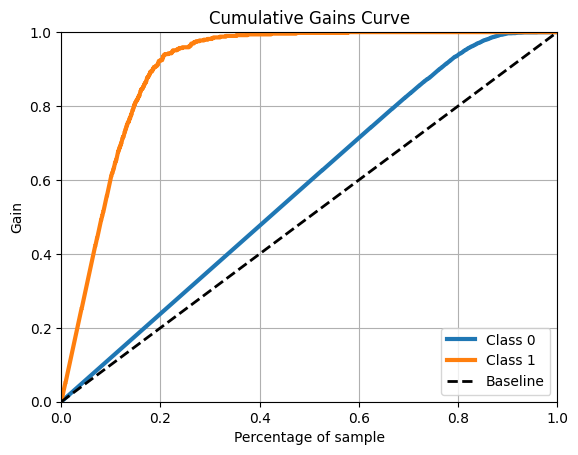

In [77]:
skplt.metrics.plot_cumulative_gain(y_test, xgb_pred_proba)

## Lift Curve

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

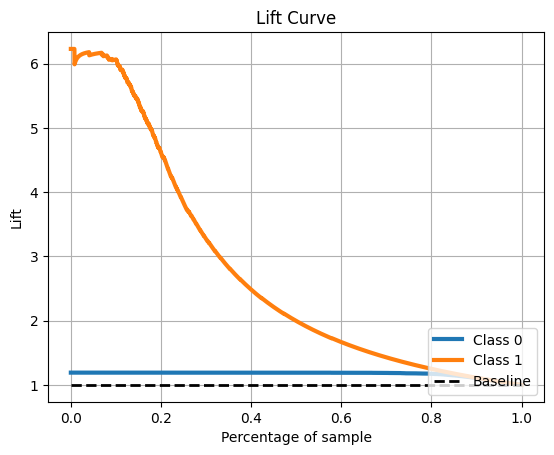

In [78]:
skplt.metrics.plot_lift_curve(y_test, xgb_pred_proba)

## Profit Curve

In [79]:
def standard_confusion_matrix(y_true, y_pred):
    '''
    Reformat confusion matrix output from sklearn for plotting profit curve.
    '''
    [[tn, fp], [fn, tp]] = metrics.confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def plot_profit_curve(model_object, costbenefit_mat, y_proba, y_test):
    '''
    Plot profit curve.

    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    '''

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)

    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = metrics.confusion_matrix(y_test, y_pred)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)

    print(profits)
    # Profit curve plot
    model_name = model_object.__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${:.2f}'.format(model_name, max_profit))


In [80]:
# create cost benefit matrix
costbenefit_mat = np.array([[0, -10],
                            [0, 20 - 10]])

In [81]:
# check cost benefit matrix
costbenefit_mat

array([[  0, -10],
       [  0,  10]])

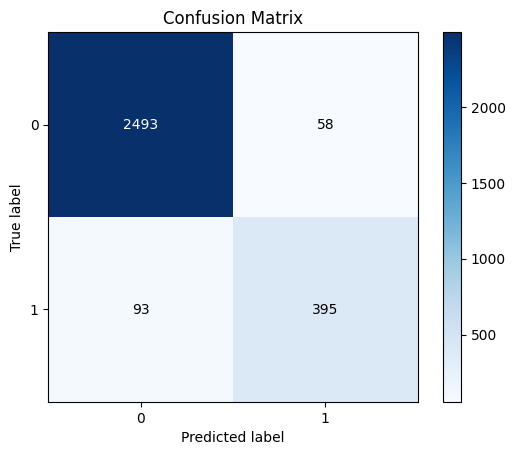

In [82]:
# check model confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

[0.0, 0.003290556103981573, 0.006581112207963146, 0.009871668311944718, 0.013162224415926292, 0.016452780519907863, 0.019743336623889437, 0.02303389272787101, 0.026324448831852584, 0.029615004935834157, 0.03290556103981573, 0.0361961171437973, 0.039486673247778874, 0.04277722935176045, 0.04606778545574202, 0.049358341559723594, 0.05264889766370517, 0.05593945376768674, 0.059230009871668314, 0.06252056597564988, 0.06581112207963145, 0.06910167818361303, 0.0723922342875946, 0.07568279039157617, 0.07897334649555775, 0.08226390259953932, 0.07897334649555775, 0.08226390259953932, 0.0855544587035209, 0.08884501480750247, 0.09213557091148404, 0.09542612701546561, 0.09871668311944719, 0.10200723922342876, 0.10529779532741033, 0.10858835143139191, 0.11187890753537348, 0.11516946363935505, 0.11846001974333663, 0.1217505758473182, 0.12504113195129976, 0.12833168805528133, 0.1316222441592629, 0.13491280026324448, 0.13820335636722605, 0.14149391247120763, 0.1447844685751892, 0.14807502467917077, 0.

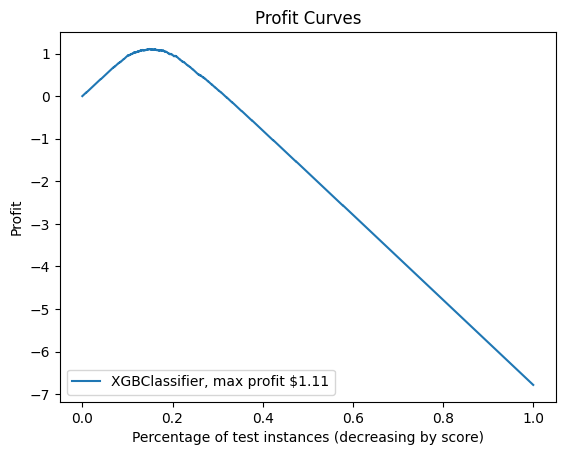

In [83]:
plot_profit_curve(xgb_clf, costbenefit_mat, xgb_pred_proba[:,1], y_test)
plt.xlabel('Percentage of test instances (decreasing by score)')
plt.ylabel('Profit')
plt.title('Profit Curves')
plt.legend(loc='lower left')
plt.show()